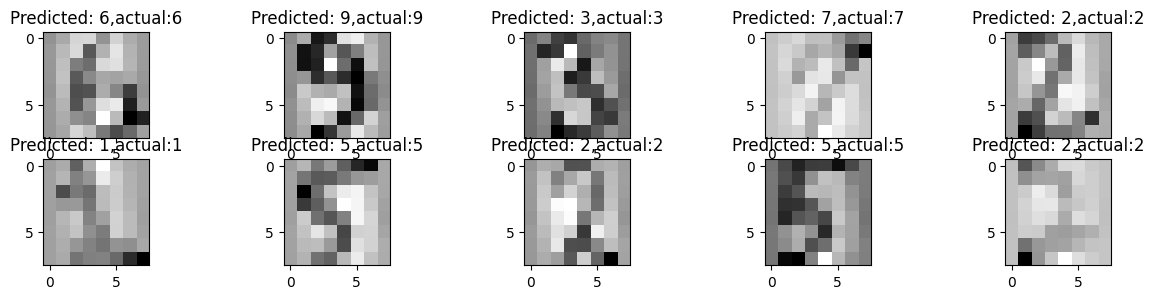

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load MNIST dataset from sklearn
digits = datasets.load_digits()
X = digits.images
y = digits.target

# Flatten each 8x8 image into a 64-length vector
X = X.reshape((X.shape[0], -1))

# Split into training and testing sets (adjusting test_size to 20% if needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data for SVM (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM classifier using an RBF kernel (commonly better for non-linear data)
svm_model = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

plt.figure(figsize=(15,  8))
for i in range(10):
  plt.subplot(5,  5,  i  + 1)
  plt.imshow(X_test[i].reshape(8,  8),  cmap=plt.cm.gray_r)
  plt.title(f'Predicted: {y_pred[i]},actual:{y_test[i]}')
  plt.axis('on')
plt.show()
